In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs


In [3]:
# Create Datasets

X,y = make_blobs(n_samples = 1000, n_features = 2, centers=2,random_state=0)


dataset_array = np.concatenate((X,y.reshape(-1,1)),axis=1)

dataset_df = pd .DataFrame(dataset_array, columns=['Col 1', 'Col 2','Target'])
dataset_df

## centers = 2: This sets the number of clusters to generate in the dataset to 2
# random_state ensures that the dataset is generated in a reproducible way by setting a seed from the random number generator


,Col 1,Col 2,Target
0,0.466618,3.865713,0.0
1,2.843828,3.326509,0.0
2,0.611215,2.512460,0.0
3,3.816534,1.651759,1.0
4,1.280972,0.628274,1.0
...,...,...,...
995,2.168005,1.554931,1.0
996,1.171340,2.522224,0.0
997,2.083030,0.472121,1.0
998,1.441933,2.767544,0.0


<Axes: xlabel='Col 1', ylabel='Col 2'>

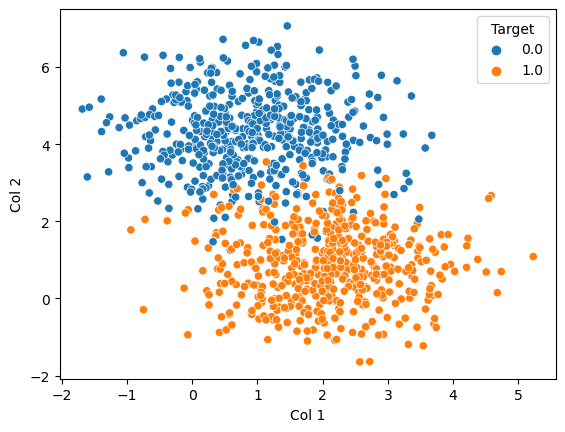

In [4]:
sns.scatterplot(x='Col 1',y='Col 2',data=dataset_df,hue='Target')

# FUNCTION FOR LOGISTIC REGRESSION

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def hypothesis(x,theta):
    z= np.dot(X,theta)    # h(x)= sigmoid(X.theta)
    return sigmoid(z)

In [7]:
# LOSS Function
def binary_cross_entropy(x,y,theta):
    m,n = x.shape   # it returns a tuple representing the dimensions of the array 'x'
    
    y_hat = hypothesis(x,theta)
    
    loss = y*np.log(y_hat)+ (1-y)*np.log(1-y_hat)
    return - np.mean(loss)

In [8]:
# Compute the gradient

def gradient(x,y,theta):
    y_hat = hypothesis(x,theta)
    grad = np.dot(x.T, (y-y_hat))
    return - grad/x.shape[0]

# x.T gives transpose of the matrix
# y-y_hat difference bw true y and predicted yhat also known as error or residual
# dot product gives the errors weighted by the input features

In [9]:
def gradient_descent(x,y,n_iter=100,alpha=0.1):
    m,n = x.shape
    theta = np.zeros(shape=(n,))
    error =[]
    for i in range(n_iter):
        loss = binary_cross_entropy(x,y,theta)
        error.append(loss)
        grad = gradient(x,y,theta)
        theta = theta-alpha*grad
    return theta,error

In [10]:
# Add constant
dataset_df_copy = dataset_df.copy()
dataset_df_copy.insert(0,'Constant',np.ones(shape=(dataset_df_copy.shape[0],1)))

In [11]:
X = dataset_df_copy.drop('Target',axis=1)
y = dataset_df_copy['Target']
theta,error = gradient_descent(X,y,10000)


In [12]:
print(theta)
print('******************')
print(error[-1])

[ 6.40438387  0.85948565 -2.95962436]
******************
0.10464193323189754


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylBE'

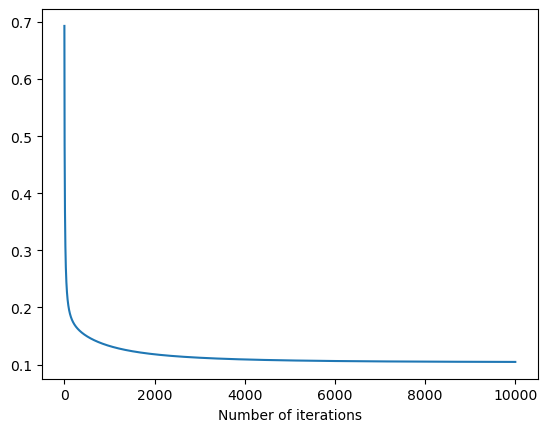

In [13]:
plt.plot(error)
plt.xlabel('Number of iterations')
plt.ylBE

## Plotting the dataset

In [15]:
# plot the dataset along with the decision boundary

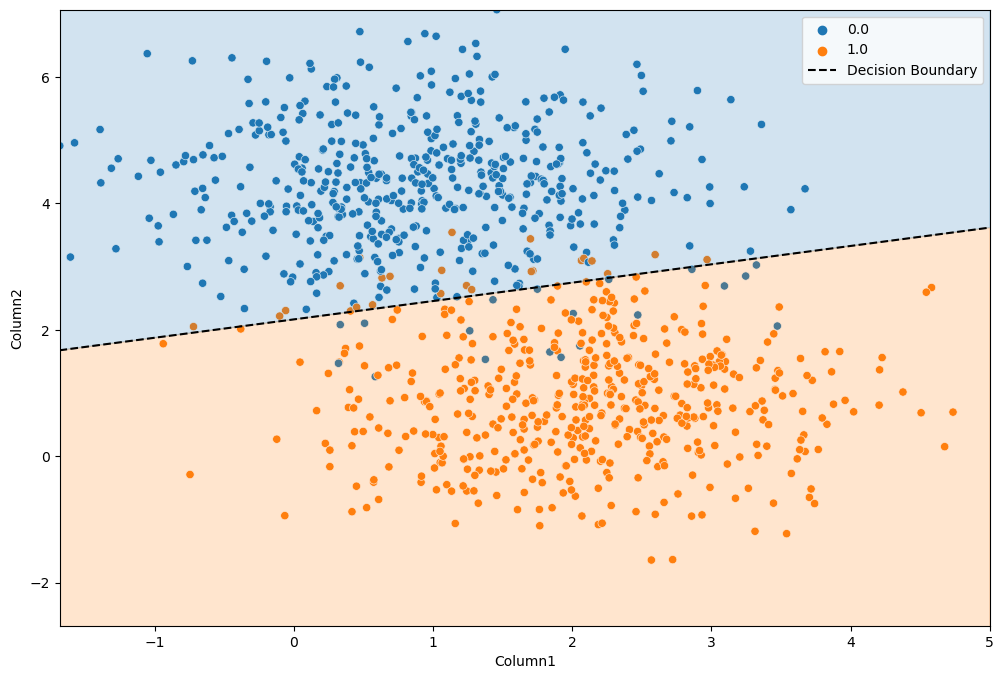

In [25]:
x2_max, x2_min = X['Col 2'].max(), X['Col 1'].min()
x1_max, x1_min = X['Col 1'].max(), X['Col 1'].min()

x_vals = np.array([-2,5])
slope = -theta[1]/ theta[2]
intercept = -theta[0]/ theta[2]
decision_boundary = slope*x_vals+intercept


# plot the dataset with decision bounddR
plt.figure(figsize = (12,8))
sns.scatterplot(x='Col 1', y = 'Col 2',data = dataset_df ,hue ='Target')
plt.plot(x_vals, decision_boundary,linestyle='--',color ='black',label ='Decision Boundary')
plt.fill_between(x_vals,decision_boundary, x2_min-10, color = 'tab:orange',alpha=0.2)

plt.fill_between(x_vals,decision_boundary, x2_max+10, color ='tab:blue', alpha= 0.2)
plt.xlabel('Column1')
plt.ylabel('Column2')
plt.ylim(x2_min-1,x2_max) # ylim controls the value of the displayed on the yaxis
plt.xlim(x1_min, 5)
plt.legend(loc='best')
plt.show()

## Comparing the results with Scikit Learns's Logistic Regression

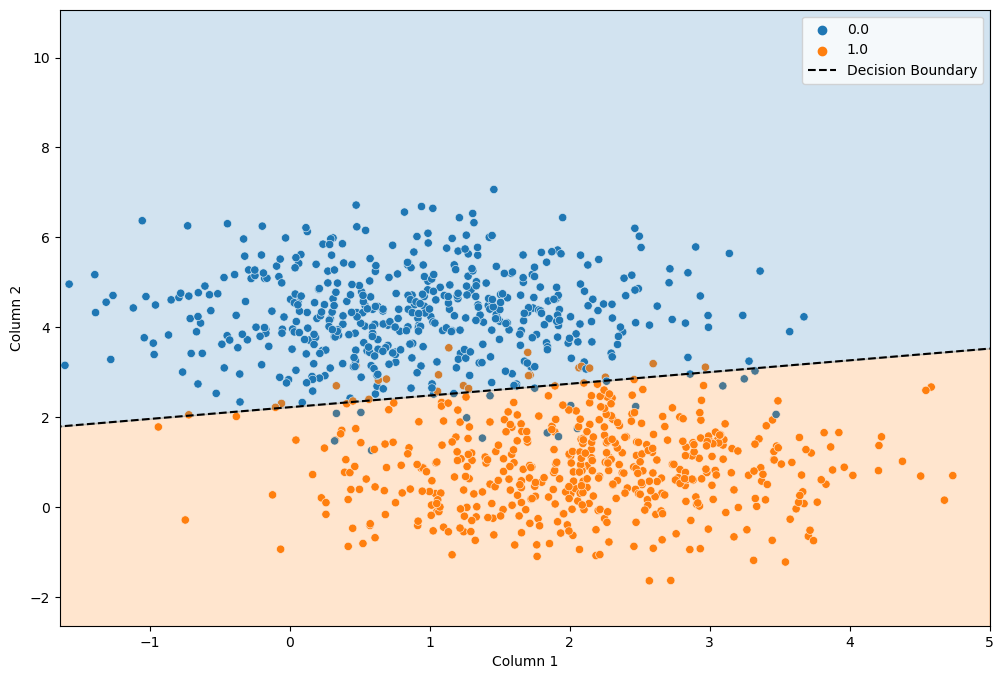

In [38]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X.drop('Constant',axis=1),y)  # this line fits a linear regression model to the data

theta_sklearn = lr.coef_
intercept_sklearn = lr.intercept_

# Creating the decision boundary

x2_max,x2_min = X['Col 1'].max(), X['Col 2'].min()

x1_max, x1_min = X['Col 2'].max(), X['Col 2'].min()

x_vals = np.array([-2,5])
slope = -theta_sklearn[0][0]/ theta_sklearn[0][1]
intercept  = -intercept_sklearn/theta_sklearn[0][1]
decision_boundary = slope*x_vals + intercept

# plot the dataset
plt.figure(figsize=(12,8))
sns.scatterplot(data= dataset_df, x='Col 1',y='Col 2',hue='Target')

plt.plot(x_vals , decision_boundary, linestyle ='--',color='black',label='Decision Boundary')
plt.fill_between(x_vals,decision_boundary,x2_min-10,color='tab:orange',alpha=0.2)

plt.fill_between(x_vals,decision_boundary,x2_max+10,color ='tab:blue',alpha=0.2)
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.ylim(x2_min-1, x1_max+4)
plt.xlim(x1_min,5)
plt.legend(loc='best')  # it adds the legend to  the plot and best means it will choose the best place so that no place in the graph is covered

plt.show()

In [39]:
# Print the Custom Logisit Regression's results
print("Weights of variable given out by custom Logistic Regression")
print("Col 1: {}".format(theta[1]))
print("Col 2: {}".format(theta[2]))
print("Intercept : {}".format(theta[0]))
print()

print("Weights of variable given out by Sklearn's Logistic Regression")
print("Col 1: {}".format(theta_sklearn[0][0]))
print("Col 2: {}".format(theta_sklearn[0][1]))
print("Intercept : {}".format(intercept_sklearn[0]))

Weights of variable given out by custom Logistic Regression
Col 1: 0.8594856524980917
Col 2: -2.9596243617462066
Intercept : 6.404383872928324

Weights of variable given out by Sklearn's Logistic Regression
Col 1: 0.7803648552218098
Col 2: -2.9919224353301463
Intercept : 6.638932396680607


## Compute the accuracy for both models

In [43]:
# Custom Logisitc Regression
predictions_1 = np.round(hypothesis(X.drop('Constant',axis=1),theta))
acc1 = np.sum(predictions_1==y)/ len(y)*100
print('Accuracy of custom Logistic Regression Classifier :{}%'.format(acc1))
predictions_2 = lr.predict(X.drop('Constant', axis=1))
acc2 = np.sum(predictions_2 == y) / len(y) * 100
print('Accuracy of sklearn Logistic Regression Classifier :{}%'.format(acc2))

Accuracy of custom Logistic Regression Classifier :95.7%
Accuracy of sklearn Logistic Regression Classifier :95.7%


In [5]:
dataset_array

array([[0.4666179 , 3.86571303, 0.        ],
       [2.84382807, 3.32650945, 0.        ],
       [0.61121486, 2.51245978, 0.        ],
       ...,
       [2.08302965, 0.47212145, 1.        ],
       [1.44193252, 2.76754364, 0.        ],
       [1.47001186, 4.18768339, 0.        ]])